Влияние пандемии на трафик аэропортов
Этот набор данных показывает объем перевозок в аэропорт и из аэропорта в процентах от объема перевозок за базовый период. Базовый период, используемый для расчета этого показателя, -  2020 год(с марта по декабрь).
Основные цели и задачи проекта:
- Проанализировать и очистить данные
- Рассмотреть какие страны описаны в датасете и оценить процент от базового показателя перевозок ажропорта по каждой стране во время COVID-19
- Визуализировать изменения по странам на карте с возможностью обращения к датам, указанным в таблице

Импорт нужных библиотек для анализа данных 

In [34]:
import pandas as pd
import numpy 
import plotly.express as px
import plotly as plt 
import plotly.graph_objs as go
import seaborn as sns


Анализ и очистка данных(EDA)

In [35]:
df = pd.read_csv('covid_impact.csv')
df.info()
df['Date'] = df['Date'].astype('datetime64[ns]')
df.duplicated().sum() 
df.isnull().sum()
df['Country'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


array(['Australia', 'Chile', 'Canada', 'United States of America (the)'],
      dtype=object)

Оценка показателей процента от базового показателя перевозок аэропорта по каждой стране во время COVID-19

/var/folders/_z/nwf7jlg14hb9v8p41wqvwsw40000gn/T/ipykernel_1164/3761362636.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Country', ylabel='PercentOfBaseline'>

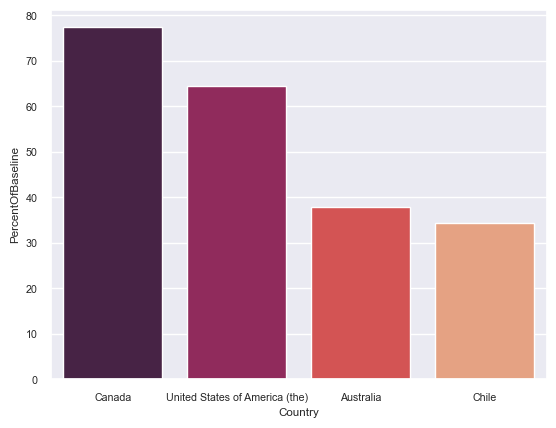

In [36]:
df1 = df.groupby("Country")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale = 0.7)
sns.barplot(data = df1, x =  'Country', y = 'PercentOfBaseline', palette = "rocket")

Визуализация данных на подвижной карте 

In [40]:
df_countrydate = df[df['PercentOfBaseline']>0]
df_countrydate = df_countrydate.groupby(['Date','Country']).sum().reset_index()
df_countrydate
fig = px.choropleth(df_countrydate, 
                    locations="Country", 
                    locationmode = "country names",
                    color="PercentOfBaseline", 
                    hover_name="Country", 
                    animation_frame="Date"
                   )
fig.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

Общие выводы:
1. В таблице упоминаются аэропорты 4 стран
2. Лидером оценки показателей процента от базового показателя перевозок аэропорта по каждой стране во время COVID-19 является Канада(около 78%), а наименьший показатель - у Чили(около 33%), что почти в два раза меньше
3. Благодаря визуализации данных на карте со шкалой процента показателя можно увидеть данные по любой стране за любую дату
4. Данные также позволяют увидеть, что несмотря на ограниченность передвижения, наложенной во время пандемии, полеты не прекращались

Данная модель показывает взаимосвязь периода пандемии и перелетов. За девять месяцев пандемия сильно повлияла на нашу жизнь, в особенности на международные путешествия, что помогает увидеть и проанализировать данный датасет